In [2]:
# Dataset
import torch
import os
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import scipy as sp
# train_dir = Path(r'C:\Users\sebas\Documents\MATLAB\DataProCiencia\DeepLearning\train')
train_dir = Path(r'C:\Users\smerino.C084288\Documents\Datasets\ACS\train')


# Final version of dataset

In [9]:
class CustomDataset(Dataset):
    def __init__(self, data_folder):
        data_folder = Path(data_folder)
        self.input_folder = data_folder/'input'
        self.output_folder = data_folder/'output'
        self.data_file_list = sorted(os.listdir(self.input_folder))

    def __len__(self):
        return len(self.data_file_list)

    def __getitem__(self, idx):
        input_path = os.path.join(self.input_folder, self.data_file_list[idx])
        output_path = os.path.join(self.output_folder, self.data_file_list[idx])
        sld = np.load(input_path)
        att_ideal = np.load(output_path)

        return torch.Tensor(sld), torch.Tensor(att_ideal).unsqueeze(0)

In [10]:
from torch.utils.data import DataLoader

dataset = CustomDataset(train_dir)
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)

x,y = next(iter(dataloader))
len(dataloader)

5

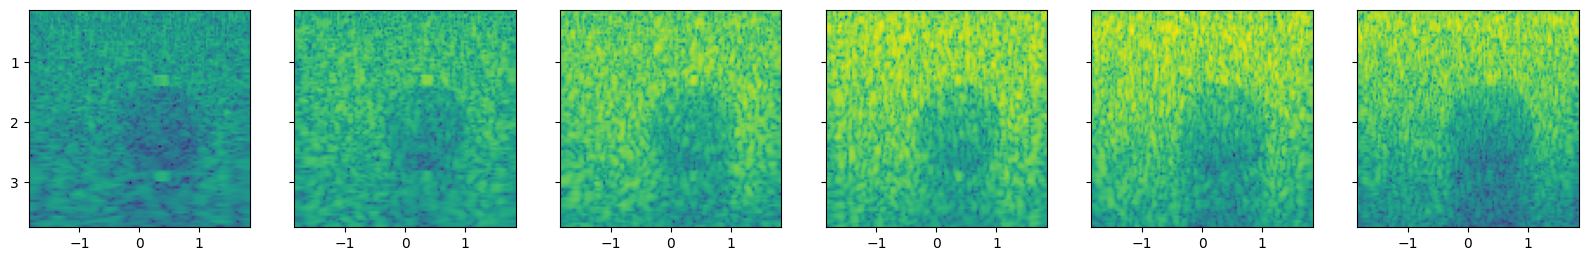

In [35]:
extent_ACS=(-1.845, 1.845, 3.751, 0.128)

fig, ax = plt.subplots(nrows = 1, ncols=6, sharex=True, sharey=True, figsize=(20,5))
for i in range(len(ax)):
    channel_data = x[0,10*i,:,:].squeeze().numpy()
    ax[i].imshow(channel_data, extent=extent_ACS, vmin=-80, vmax=0)
    # plt.clim(-40,-20)
    # plt.colorbar(ax=ax[i])
# cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7]) 

plt.show()

Mean: -32.91862487792969, std: 14.433980941772461


[]

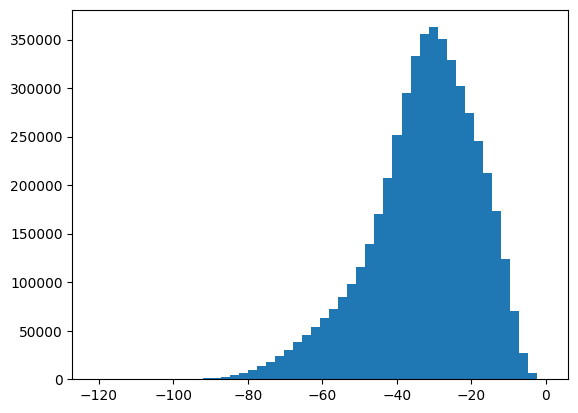

In [4]:
data_vec = x.numpy().flatten()
print(f"Mean: {data_vec.mean()}, std: {data_vec.std()}")
plt.hist(data_vec,50)
plt.plot()

In [36]:
from torchvision import transforms
class CustomDataset(Dataset):
    def __init__(self, data_folder):
        data_folder = Path(data_folder)
        self.input_folder = data_folder/'input'
        self.output_folder = data_folder/'output'
        self.data_file_list = sorted(os.listdir(self.input_folder))

    def __len__(self):
        return len(self.data_file_list)

    def __getitem__(self, idx):
        input_path = os.path.join(self.input_folder, self.data_file_list[idx])
        output_path = os.path.join(self.output_folder, self.data_file_list[idx])
        sld = np.load(input_path)
        att_ideal = np.expand_dims(np.load(output_path),axis=0)

        input_transforms = transforms.Compose([
            torch.Tensor,
            transforms.Normalize(-40,40),
        ])

        output_transforms = transforms.Compose([
            torch.Tensor,
            transforms.Normalize(1,1)
        ])

        x = input_transforms(sld)
        y = output_transforms(att_ideal)

        return x,y

In [37]:
from torch.utils.data import DataLoader

dataset = CustomDataset(train_dir)
dataloader = DataLoader(dataset=dataset, batch_size=6, shuffle=True)

x,y = next(iter(dataloader))

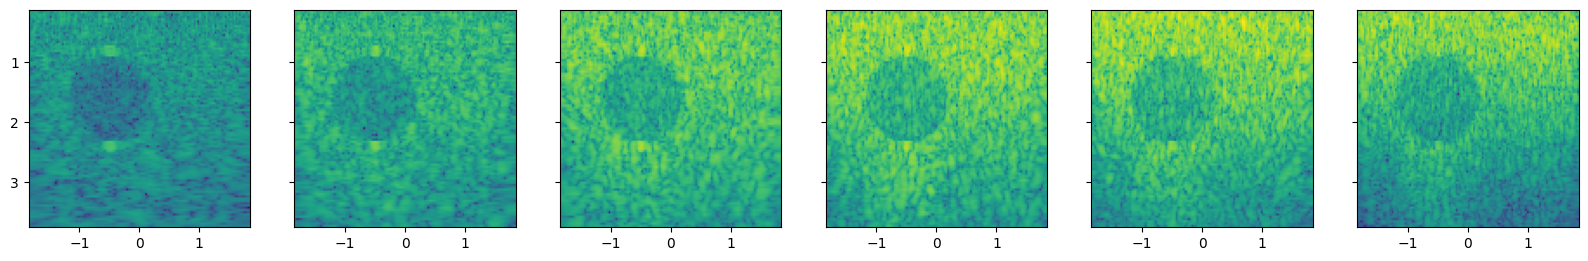

In [50]:
extent_ACS=(-1.845, 1.845, 3.751, 0.128)

fig, ax = plt.subplots(nrows = 1, ncols=6, sharex=True, sharey=True, figsize=(20,5))
for i in range(len(ax)):
    channel_data = x[2,10*i,:,:].squeeze().numpy()
    ax[i].imshow(channel_data, extent=extent_ACS, vmin=-1, vmax=1)
    # plt.clim(-40,-20)
    # plt.colorbar(ax=ax[i])
# cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7]) 
# cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
# cbar = fig.colorbar(ax[-1].imshow(matriz0), cax=cbar_ax)
plt.show()

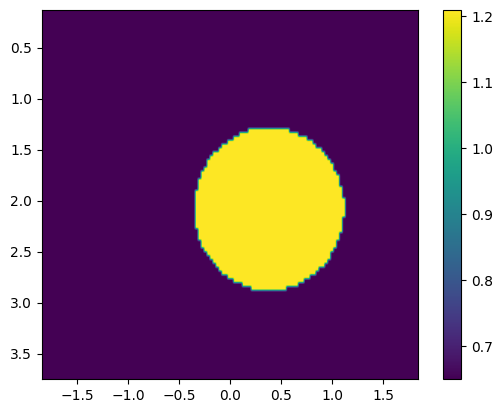

In [42]:
plt.imshow(y[0].squeeze() + 1, extent=extent_ACS)
plt.colorbar()
plt.show()

Mean: 0.17703448235988617, std: 0.36084961891174316


[]

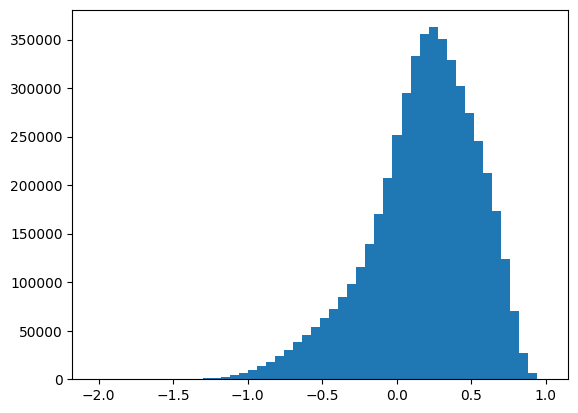

In [40]:
data_vec = x.numpy().flatten()
print(f"Mean: {data_vec.mean()}, std: {data_vec.std()}")
plt.hist(data_vec,50)
plt.plot()

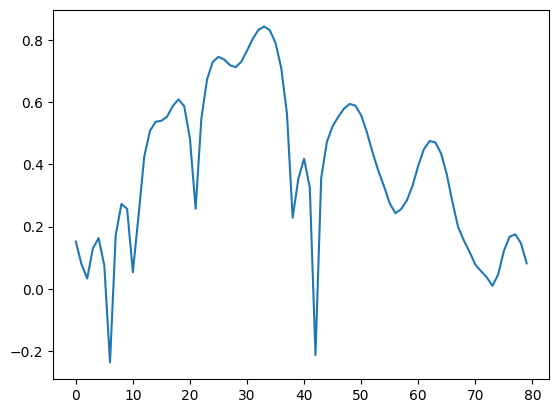

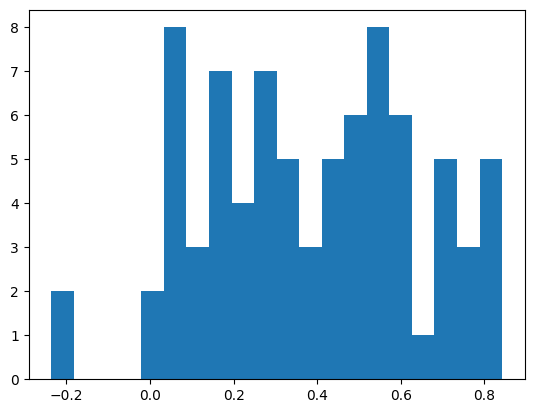

In [13]:
data_pixel = x[0,:,30,30].numpy().flatten()
plt.plot(data_pixel)
plt.show()

plt.hist(data_pixel, 20)
plt.show()

# Dataset version 2

In [102]:
from scipy.io import loadmat
from torchvision import transforms

class CustomDataset(Dataset):
    def __init__(self, data_folder, get_sld=True):
        data_folder = Path(data_folder)
        self.input_folder = data_folder/'input'
        self.output_folder = data_folder/'output'
        self.data_file_list = sorted(os.listdir(self.input_folder))
        self.get_sld = get_sld

    def __len__(self):
        return len(self.data_file_list)

    def __getitem__(self, idx):
        input_path = os.path.join(self.input_folder, self.data_file_list[idx])
        output_path = os.path.join(self.output_folder, self.data_file_list[idx])
        
        if self.get_sld:
            x = loadmat(input_path)['sld']
        else:
            x = loadmat(input_path)['spectrum']    
            
        x = np.moveaxis(x, [0, 1, 2], [1, 2, 0])
        y = np.expand_dims(loadmat(output_path)['acs'],axis=0)
        
        input_transforms = transforms.Compose([
            torch.Tensor,
            transforms.Normalize(0.354,1.079)
        ])
        output_transforms = transforms.Compose([
            torch.Tensor,
            # transforms.Normalize(0.993,0.119)
            transforms.Normalize(1,0.1)
        ])
        x = input_transforms(x)
        y = output_transforms(y)

        return x,y

In [103]:
from torch.utils.data import DataLoader

dataset = CustomDataset(train_dir)
dataloader = DataLoader(dataset=dataset, batch_size=24, shuffle=True)

x, y = next(iter(dataloader))
len(dataloader)


1

In [104]:
output_path = os.path.join(dataset.output_folder, dataset.data_file_list[0])
mat_info = loadmat(output_path)
x_ACS = np.squeeze(mat_info['x_ACS'])
z_ACS = np.squeeze(mat_info['z_ACS'])
extent_ACS = (x_ACS[0], x_ACS[-1], z_ACS[0], z_ACS[-1])


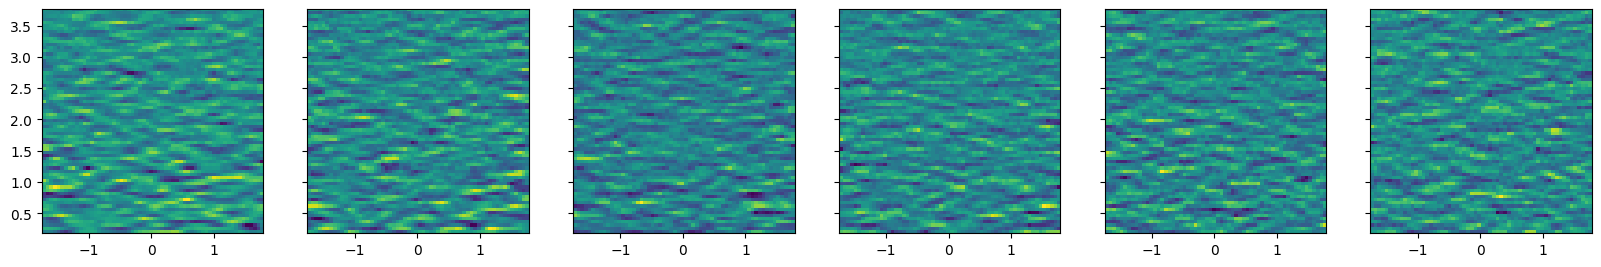

In [105]:
#extent_ACS = (-1.845, 1.845, 3.751, 0.128)

fig, ax = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, figsize=(20, 5))
for i in range(len(ax)):
    channel_data = x[0, 10*i, :, :,].squeeze().numpy()
    ax[i].imshow(channel_data, extent=extent_ACS)
plt.show()


Mean: 0.0002673461567610502, std: 0.9999133348464966


[]

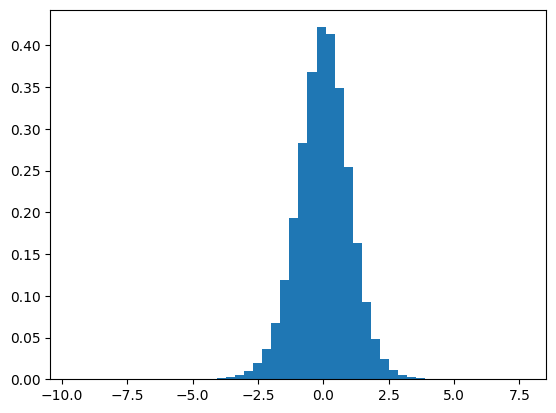

In [106]:
data_vec = x.numpy().flatten()
print(f"Mean: {data_vec.mean()}, std: {data_vec.std()}")
plt.hist(data_vec, 50, density=True)
plt.plot()

Mean: -0.0699114203453064, std: 1.18716561794281


[]

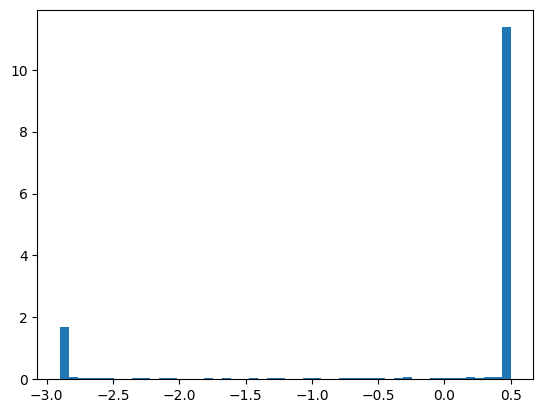

In [107]:
data_vec = y.numpy().flatten()
print(f"Mean: {data_vec.mean()}, std: {data_vec.std()}")
plt.hist(data_vec, 50, density=True)
plt.plot()

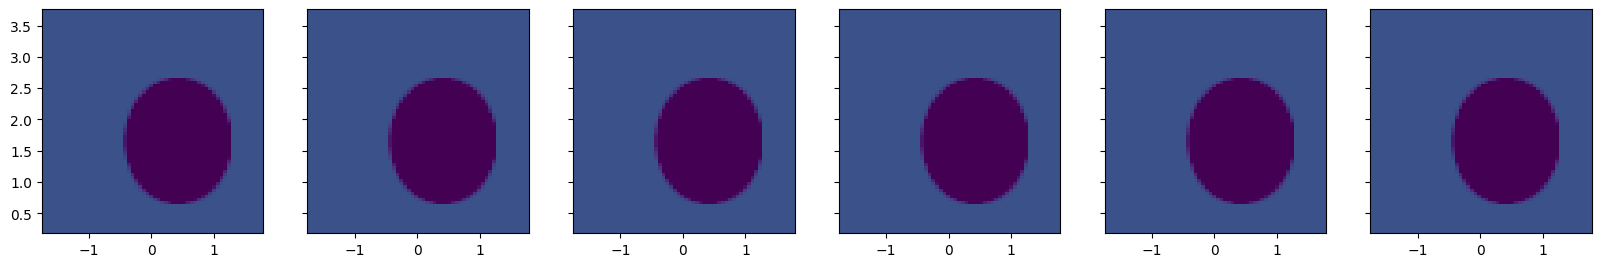

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True, figsize=(20, 5))
for i in range(len(ax)):
    channel_data = y[i, :, :,].squeeze().numpy()
    ax[i].imshow(channel_data, extent=extent_ACS, vmin=0, vmax=2)
plt.show()